In [ ]:
"""
-content(原本colab 已經存在的根目錄)
  |
  |-train_DR
  |
  |-dataset
  |  |--split_train
  |  |
  |  |--split_validation
  |  |
  |  |--test
  |
  |-Test.csv
  |-Train.csv
"""

'\n-content(原本colab 已經存在的根目錄)\n  |\n  |-train_DR\n  |\n  |-dataset\n  |  |--split_train\n  |  |\n  |  |--split_validation\n  |  |\n  |  |--test\n  |-Test.csv\n  |-Train.csv\n'

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
"""
用於split_data函數
"""
import random
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """
    listdir_image_source = os.listdir(SOURCE_DIR)

    for dir in listdir_image_source:
        if os.path.getsize(os.path.join(SOURCE_DIR,dir)) == 0:
            listdir_image_source.remove(dir)
            filename = dir
            print(f'{filename} is zero length, so ignoring.')

    number_of_available_images = len(listdir_image_source)
    file_to_training_dir = random.sample( listdir_image_source, int(len(listdir_image_source) * SPLIT_SIZE) )
    file_to_validation_dir = list( set(listdir_image_source).difference(set(file_to_training_dir)) )
    for dir in file_to_training_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = TRAINING_DIR
        copyfile(source, os.path.join(destination, dir))

    for dir in file_to_validation_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = VALIDATION_DIR
        copyfile(source, os.path.join(destination, dir))

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [ ]:
test.head()

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021


In [ ]:
print("There are ",train.duplicated().sum()," data point are duplicated in train.")
print("There are ",test.duplicated().sum()," data point are duplicated in test.")

There are  0  data point are duplicated in train.
There are  0  data point are duplicated in test.


In [ ]:
reduced_train = train.drop(['ID','filename'],axis=1, inplace=False)
reduced_test = test.drop(['ID','filename'],axis=1, inplace=False)
total = pd.concat([reduced_train, reduced_test], ignore_index=True)
print("The shape of the reduced_train data:",reduced_train.shape)
print("The shape of the reduced_test data:",reduced_test.shape)
print("The shape of the total data",total.shape)

The shape of the reduced_train data: (26068, 4)
The shape of the reduced_test data: (8663, 3)
The shape of the total data (34731, 4)


In [ ]:
reduced_train.head()

,growth_stage,damage,extent,season
0,S,WD,0,SR2020
1,V,G,0,SR2021
2,V,G,0,LR2020
3,M,DR,60,SR2020
4,V,G,0,SR2021


In [ ]:
# 開始EDA

In [ ]:
num_var = [column for column in reduced_train.columns if reduced_train[column].nunique()>10]
bin_var = [column for column in reduced_train.columns if reduced_train[column].nunique() == 2]
cat_var = ['growth_stage','damage','season']
target = 'extent'

In [ ]:


print(" #numerical variables : ",len(num_var))
print(" #binary variables : ",len(bin_var))
print(" #categorical variables : ",len(cat_var))
print(" Target variable is :",target)

 #numerical variables :  1
 #binary variables :  0
 #categorical variables :  3
 Target variable is : extent


In [ ]:
reduced_train.describe()

,extent
count,26068.000000
mean,7.096056
std,18.613229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [ ]:
"""
這個函數列出所有不同變數的
missing#
missing%
uniques
count
這在補缺失值的時候，相當相當重要!!
"""
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum()/len(df))
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values

    return sum

summary(reduced_train)


,dtypes,missing#,missing%,uniques,count
growth_stage,object,0,0.0,4,26068
damage,object,0,0.0,8,26068
extent,int64,0,0.0,11,26068
season,object,0,0.0,4,26068


In [ ]:
# There is no missing value in the train data

In [ ]:
summary(reduced_test)

,dtypes,missing#,missing%,uniques,count
growth_stage,object,0,0.0,4,8663
damage,object,0,0.0,8,8663
season,object,0,0.0,4,8663


In [ ]:
# There is no missing value in the train data

column =  growth_stage


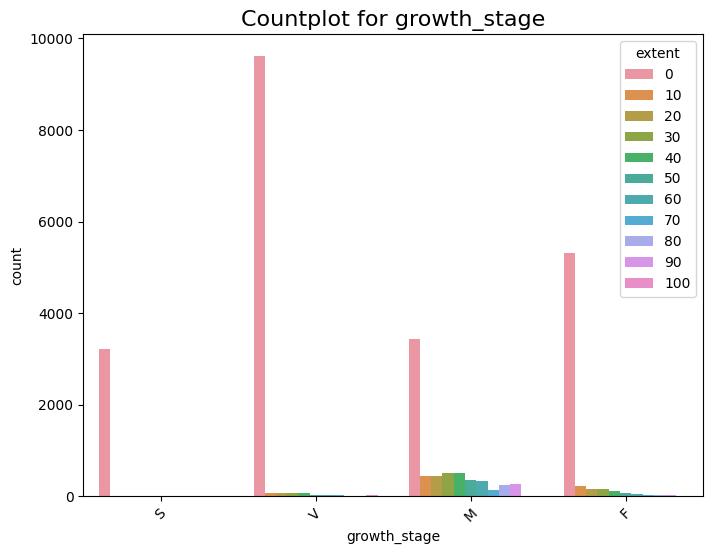

column =  damage


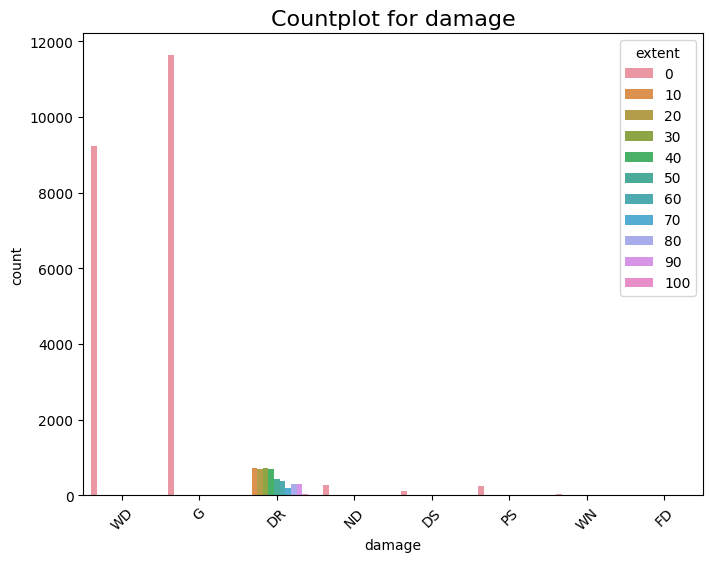

column =  season


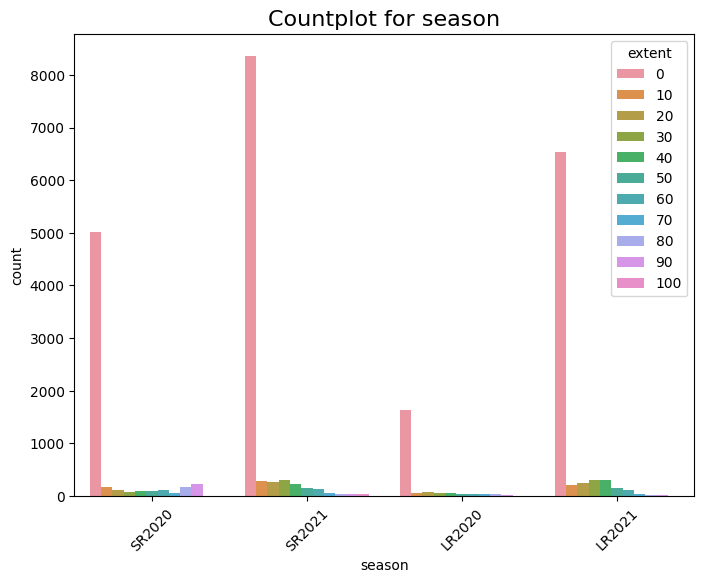

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(df, cat_var, hue):
    for column in cat_var:
      print("column = ",column)
      plt.figure(figsize=(8, 6))
      sns.countplot(data=df, x=column, hue=target) # target = 'extent'
      plt.title(f'Countplot for {column}', fontsize=16)
      plt.xticks(rotation=45)
      plt.show()
plot_count(df=train, cat_var=cat_var, hue=target)


It's clear to see that the amount of the case "extent equal to zero" is very large so I decide to use a filter here and plot again :

column =  growth_stage


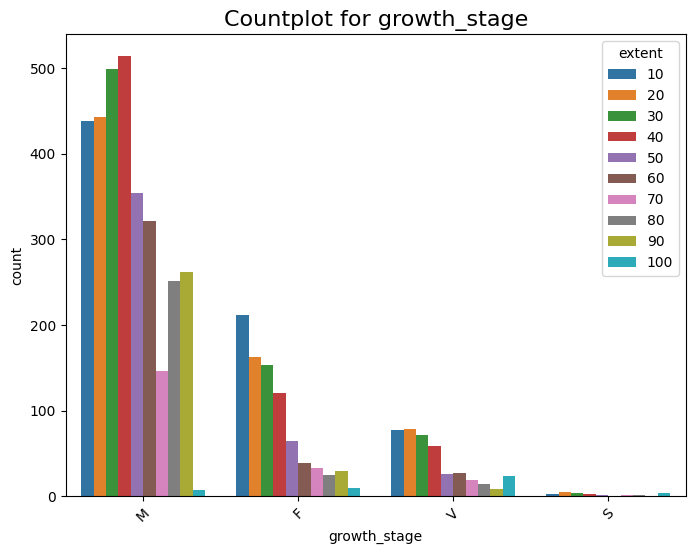

column =  damage


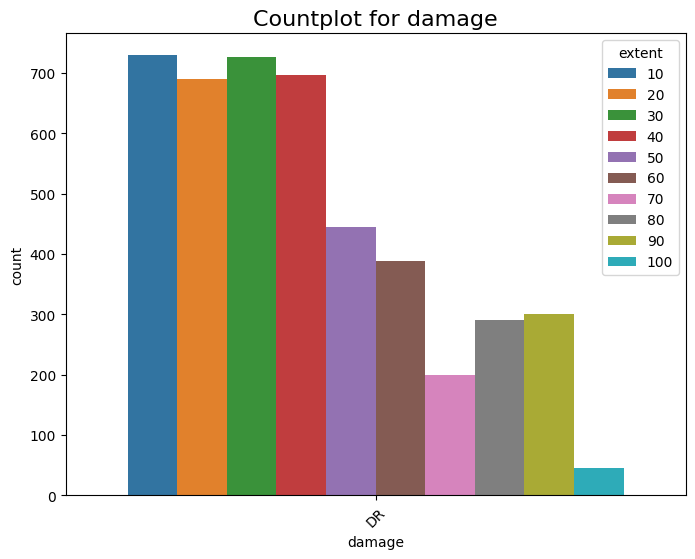

column =  season


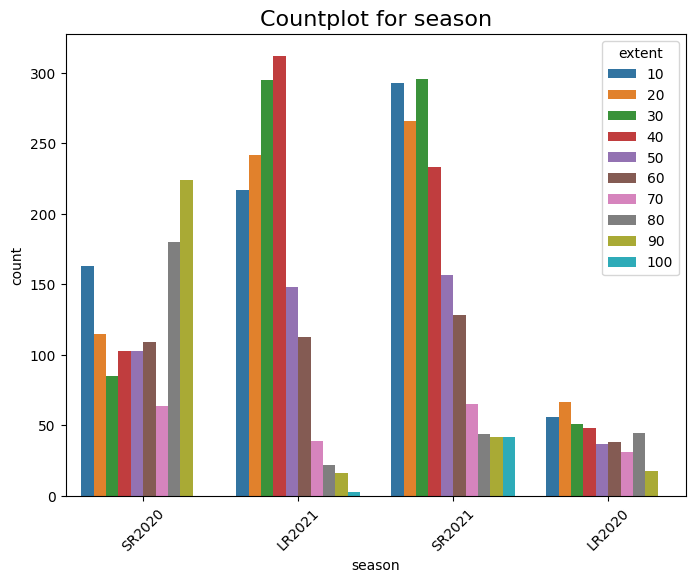

In [ ]:
filtered_train = train[train['extent'] != 0]
plot_count(df=filtered_train, cat_var=cat_var, hue=target)

 Noteworthy Observations:

1
 It's worth noting that when damage is not equal to DR, there is no claims case (nonzero extent).

 What's more, if you compare damage in filtered plot to the original one, you also can see that applications without damage (DR) are all disapproved.

2
When growth_stage='S', there is no case with extent>0.

In [ ]:
from scipy import stats
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _ , _= stats.chi2_contingency(contingency_table)

    if p < significance_level:
        print(f'{input_var} has a significant relationship with the target.')
    else:
        print(f'{input_var} does not have a significant relationship with the target.')

In [ ]:
# Use chi squared independence test to choose categorical features

In [ ]:
for i in cat_var:
  chi_squared_test(df=train, input_var=i, target_var=target)

growth_stage has a significant relationship with the target.
damage has a significant relationship with the target.
season has a significant relationship with the target.


In [ ]:
train

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


In [ ]:
train['growth_stage'] = train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})
filtered_train['growth_stage'] = filtered_train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})

<ipython-input-28-010789f12729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train['growth_stage'] = filtered_train['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})


In [ ]:
train

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,1,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,2,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,2,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,2,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,4,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,2,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,4,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,3,G,0,SR2020


In [ ]:
train['damage'].value_counts()

G     11623
WD     9238
DR     4516
ND      272
PS      254
DS      115
WN       37
FD       13
Name: damage, dtype: int64

In [ ]:
filtered_train

,ID,filename,growth_stage,damage,extent,season
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020
...,...,...,...,...,...,...
26050,ID_3JV0GAM9RJ,L428F00215C39S12374Rp47711.jpg,4,DR,60,SR2021
26052,ID_DWIR1Z10V3,L1094F00322C01S01964Rp02621.jpg,4,DR,10,SR2020
26055,ID_PI5UR92PXC,L1084F00023C01S01952Rp09997.jpg,4,DR,20,SR2020
26057,ID_WGVVG53Y3S,L376F03264C39S14382Rp46972.jpg,2,DR,20,SR2021


If we remove all "extent = 0" cases, we can see that damage can only be 'DR':

In [ ]:
filtered_train['damage'].value_counts()

DR    4510
Name: damage, dtype: int64

However, even when "damage = 'DR'," we can still observe scattered "extent = 0" cases and many other non-zero cases.

In [ ]:
train['extent'].loc[train['damage']=='DR'].value_counts()

10     729
30     727
40     696
20     690
50     445
60     388
90     300
80     291
70     199
100     45
0        6
Name: extent, dtype: int64

In [ ]:
# 把要訓練迴歸模型的檔案先移到雲端，下次就不用載這麼多文件
def move_files(sourse_base, source_dir_list, destination_dir):
  for dir in source_dir_list:
    source = os.path.join(sourse_base, dir)
    destination = destination_dir
    copyfile(source, os.path.join(destination_dir, dir))

sourse_base = 'Zindi_photos/train'
source_dir_list = train.loc[train['damage'] == 'DR']['filename'].tolist()
destination_dir = 'Zindi_photos/train_DR'



Thus, we can make some assumption of the dataset:


1.   假設在damage != DR 時，extent>0的機率為0。
2.   假設在growth_stage = S時，extent>0的機率為0。
3.   假設Train和Test所有特徵的分布完全相同。





這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!
這裡要打latex!!!!!!!!!!!!!!!

In [ ]:
#SOURCE_DIR = '/content/train_DR'
TRAINING_DIR = '/content/dataset/split_train'
VALIDATION_DIR = '/content/dataset/split_validation'
SPLIT_SIZE = 0.95

In [ ]:
split_data(SOURCE_DIR='Zindi_photos/train_DR', TRAINING_DIR=TRAINING_DIR, VALIDATION_DIR=VALIDATION_DIR, SPLIT_SIZE=SPLIT_SIZE)

In [ ]:
print(len(os.listdir(TRAINING_DIR)))
print(len(os.listdir(VALIDATION_DIR)))

4290
226


In [ ]:
import os
list_split_train = os.listdir(TRAINING_DIR)
list_split_validation = os.listdir(VALIDATION_DIR)
list_split_train[:10]

['L1102F01999C39S11601Rp41656.jpg',
 'L1122F01711C39S11890Rp37385.jpg',
 'L323F03075C01S01451Rp14333.jpg',
 'L353F02184C39S12257Rp38642.jpg',
 'L144F03153C01S00171Rp14664.jpg',
 'L221F02158C39S13994Rp46272.jpg',
 'L134F00822C01S01077Rp12989.jpg',
 'L342F01545C01S00377Rp14592.jpg',
 'L1083F00021C39S12454Dp39532.jpg',
 'L315F01657C01S02185Rp15044.jpg']

In [ ]:
# 資料順序跟train_df相同，只是不在list_split_train中的會排除掉。
split_train_df = filtered_train[filtered_train['filename'].isin(list_split_train)]
split_val_df = filtered_train[filtered_train['filename'].isin(list_split_validation)]

train_data = split_train_df
val_data = split_val_df

print("train_data.shape = ",train_data.shape)
display(train_data.head(10))

print("val_data.shape = ",val_data.shape)
display(val_data.head(10))

train_data.shape =  (4284, 6)


,ID,filename,growth_stage,damage,extent,season
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020
24,ID_BDV1VQRJAS,L398F00102C01S01131Rp13276.jpg,4,DR,50,SR2020
29,ID_8CGJ7AF96E,L134F00780C01S09773Rp27555.jpg,2,DR,30,LR2021
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,4,DR,70,SR2020
43,ID_53R92CXW1E,L1094F03163C39S11589Rp41682.jpg,4,DR,40,SR2021
57,ID_PGRVYINBAY,L1089F03143C01S08323Rp30596.jpg,4,DR,10,LR2021
58,ID_C0Q01LUY08,L1136F02414C39S11646Rp36950.jpg,4,DR,30,SR2021


val_data.shape =  (226, 6)


,ID,filename,growth_stage,damage,extent,season
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020
117,ID_FKAR5MIO34,L131F03895C01S07353Rp24537.jpg,2,DR,60,LR2021
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,SR2020
142,ID_61AQACWG7L,L133F03014C01S06954Rp25828.jpg,2,DR,40,LR2021
257,ID_4M3GZJUPUE,L134F00871C01S09793Rp23947.jpg,3,DR,30,LR2021
441,ID_3SRPLJYQYG,L141F00093C01S06986Rp27023.jpg,4,DR,20,LR2021
778,ID_M82TXHUCOD,L1084F00022C01S00077Rp04922.jpg,4,DR,40,SR2020
844,ID_MF7TVAKB6E,L1084F02124C01S02995Rp09995.jpg,4,DR,90,SR2020
933,ID_VXJXBJ4UQR,L1089F02515C01S07705Rp23738.jpg,2,DR,90,LR2021
970,ID_7TECUEOZOZ,L222F01481C01S10124Rp25530.jpg,4,DR,10,LR2021


In [ ]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
#from skimage.feature import greycomatrix, greycoprops
from PIL import Image
#from skimage import feature



def glcm_feature(base_dir, filename):
  path = os.path.join(base_dir,filename)
  img = Image.open(path) # 你要用這個套件的方式去開，不能直接傳nparray
  #plt.imshow(img)
  img1 = img.convert('L')  #convert a gray scale

  # transfer img1 into np.array
  img1 = np.array(img1)

  # 計算GLCM skimage.feature.graycomatrix
  glcm = skimage.feature.greycomatrix(img1, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=None, symmetric=True, normed=True)
  #glcm = skimage.feature.greycomatrix(img1, [1], [0], symmetric=True, normed=True)

  # 計算GLCM特徵
  contrast = skimage.feature.graycoprops(glcm, prop='contrast')
  correlation = skimage.feature.graycoprops(glcm, prop='correlation')
  homogeneity = skimage.feature.graycoprops(glcm, prop='homogeneity')
  energy = skimage.feature.graycoprops(glcm, prop='energy')
  dissimilarity = skimage.feature.graycoprops(glcm, prop='dissimilarity')
  entropy = skimage.measure.shannon_entropy(glcm)

  glcm_feat = dict( contrast=contrast[0,0], correlation=correlation[0,0], homogeneity=homogeneity[0,0], energy=energy[0,0], dissimilarity=dissimilarity[0,0], entropy=entropy)
  return glcm_feat


In [ ]:
print(skimage.__version__)

0.19.3


In [ ]:
"""
feature_test = glcm_feature(base_dir='/content', filename='101_repeat_2_1309_5365_3739.JPG')
print(feature_test['contrast'])
print(feature_test['correlation'])
print(feature_test['homogeneity'])
print(feature_test['energy'])
print(feature_test['dissimilarity'])
print(feature_test['entropy'])
"""

"\nfeature_test = glcm_feature(base_dir='/content', filename='101_repeat_2_1309_5365_3739.JPG')\nprint(feature_test['contrast'])\nprint(feature_test['correlation'])\nprint(feature_test['homogeneity'])\nprint(feature_test['energy'])\nprint(feature_test['dissimilarity'])\nprint(feature_test['entropy'])\n"

In [ ]:
for index,row in train_data.iterrows():
  feat = glcm_feature(base_dir='/content/dataset/split_train',filename=row['filename'])
  train_data.loc[index, 'contrast'] = feat['contrast']
  train_data.loc[index, 'correlation'] = feat['correlation']
  train_data.loc[index, 'energy'] = feat['energy']
  train_data.loc[index,'homogeneity'] = feat['homogeneity']
  train_data.loc[index,'dissimilarity'] = feat['dissimilarity']
  train_data.loc[index,'entropy'] = feat['entropy']


In [ ]:
train_data.head(10)

,ID,filename,growth_stage,damage,extent,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,SR2020,1543.816331,0.744069,0.007898,0.057450,27.912601,5.562927
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,LR2021,87.528397,0.991091,0.076725,0.242272,6.131260,3.060475
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,LR2021,201.685012,0.979897,0.038206,0.277008,8.012614,3.768249
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,SR2020,371.669213,0.968234,0.095859,0.230157,11.731687,4.275132
24,ID_BDV1VQRJAS,L398F00102C01S01131Rp13276.jpg,4,DR,50,SR2020,68.729832,0.995397,0.041244,0.438069,4.289339,2.611904
29,ID_8CGJ7AF96E,L134F00780C01S09773Rp27555.jpg,2,DR,30,LR2021,466.647855,0.961116,0.072948,0.203923,14.275574,4.244321
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,4,DR,70,SR2020,537.569878,0.963949,0.212492,0.270315,14.790692,3.981943
43,ID_53R92CXW1E,L1094F03163C39S11589Rp41682.jpg,4,DR,40,SR2021,190.843391,0.964754,0.016302,0.194244,9.123302,2.171531
57,ID_PGRVYINBAY,L1089F03143C01S08323Rp30596.jpg,4,DR,10,LR2021,214.316627,0.959329,0.012822,0.139341,10.323550,2.358612
58,ID_C0Q01LUY08,L1136F02414C39S11646Rp36950.jpg,4,DR,30,SR2021,352.880936,0.959922,0.042842,0.433288,9.223123,8.309617


In [ ]:
# For validation we also add new feature
for index,row in val_data.iterrows():
  feat = glcm_feature(base_dir='/content/dataset/split_validation',filename=row['filename'])
  val_data.loc[index, 'contrast'] = feat['contrast']
  val_data.loc[index, 'correlation'] = feat['correlation']
  val_data.loc[index, 'energy'] = feat['energy']
  val_data.loc[index, 'homogeneity'] = feat['homogeneity']
  val_data.loc[index, 'dissimilarity'] = feat['dissimilarity']
  val_data.loc[index, 'entropy'] = feat['entropy']

In [ ]:
val_data.head(10)

,ID,filename,growth_stage,damage,extent,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,SR2020,15.685495,0.998582,0.037326,0.467399,2.345641,1.719170
117,ID_FKAR5MIO34,L131F03895C01S07353Rp24537.jpg,2,DR,60,LR2021,780.242042,0.820905,0.012948,0.068147,20.587855,4.666209
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,SR2020,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785
142,ID_61AQACWG7L,L133F03014C01S06954Rp25828.jpg,2,DR,40,LR2021,240.722604,0.976261,0.032326,0.285603,9.430024,3.434542
257,ID_4M3GZJUPUE,L134F00871C01S09793Rp23947.jpg,3,DR,30,LR2021,537.187826,0.948937,0.040355,0.173309,15.689254,4.283892
441,ID_3SRPLJYQYG,L141F00093C01S06986Rp27023.jpg,4,DR,20,LR2021,149.536613,0.986804,0.047501,0.222937,7.565975,3.466092
778,ID_M82TXHUCOD,L1084F00022C01S00077Rp04922.jpg,4,DR,40,SR2020,647.455119,0.914817,0.023044,0.208769,16.402087,4.615945
844,ID_MF7TVAKB6E,L1084F02124C01S02995Rp09995.jpg,4,DR,90,SR2020,51.968763,0.994914,0.073863,0.288353,4.706570,2.740591
933,ID_VXJXBJ4UQR,L1089F02515C01S07705Rp23738.jpg,2,DR,90,LR2021,77.231420,0.994548,0.198168,0.349184,5.256478,2.631959
970,ID_7TECUEOZOZ,L222F01481C01S10124Rp25530.jpg,4,DR,10,LR2021,1083.957378,0.816990,0.007981,0.075412,22.776157,5.472862


In [ ]:
# 就算 damage = DR ，extent的案例還是分布不平均，所以這裡我們寫一個重複採樣函數 :

def resample(df, N):
  groups = df.groupby(df.columns[-1]) #'extent'
  df_resample = pd.DataFrame({})
  for i in groups.size().index:
    resample = groups.get_group(i).sample(n=N, replace=True)
    df_resample = pd.concat([df_resample, resample])
    del(resample)
  return df_resample

In [ ]:
# 每一個小群裡面resample的數量先決定為原本最大的群的數量
"""
N = train_data['extent'].value_counts().max() #200

train_data_resample = resample(df=train_data, N=N)
display(train_data_resample)
"""

"\nN = train_data['extent'].value_counts().max() #200\n\ntrain_data_resample = resample(df=train_data, N=N)\ndisplay(train_data_resample)\n"

In [ ]:
# 對於validation set，我們先不要做resample.

In [ ]:
# 這裡負責 : 做one-hot encode
encoded_train_data = pd.get_dummies(train_data, columns=['season'])
encoded_train_data

,ID,filename,growth_stage,damage,extent,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,4,DR,60,1543.816331,0.744069,0.007898,0.057450,27.912601,5.562927,0,0,1,0
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,4,DR,40,87.528397,0.991091,0.076725,0.242272,6.131260,3.060475,0,1,0,0
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,3,DR,60,201.685012,0.979897,0.038206,0.277008,8.012614,3.768249,0,1,0,0
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,4,DR,50,371.669213,0.968234,0.095859,0.230157,11.731687,4.275132,0,0,1,0
24,ID_BDV1VQRJAS,L398F00102C01S01131Rp13276.jpg,4,DR,50,68.729832,0.995397,0.041244,0.438069,4.289339,2.611904,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26050,ID_3JV0GAM9RJ,L428F00215C39S12374Rp47711.jpg,4,DR,60,87.034287,0.991499,0.035515,0.293729,5.797819,1.787493,0,0,0,1
26052,ID_DWIR1Z10V3,L1094F00322C01S01964Rp02621.jpg,4,DR,10,124.426496,0.987454,0.027667,0.266567,7.278348,3.157994,0,0,1,0
26055,ID_PI5UR92PXC,L1084F00023C01S01952Rp09997.jpg,4,DR,20,32.638113,0.997122,0.084796,0.338439,3.589756,2.439139,0,0,1,0
26057,ID_WGVVG53Y3S,L376F03264C39S14382Rp46972.jpg,2,DR,20,114.506074,0.986752,0.023548,0.194391,7.245703,2.130498,0,0,0,1


In [ ]:
# Train data
# Select numerical features from columns
selected_feature = ['growth_stage','contrast','correlation','energy','homogeneity','dissimilarity','entropy','season_LR2020','season_LR2021','season_SR2020','season_SR2021']
df_train_selected_feature = encoded_train_data[selected_feature]
display(df_train_selected_feature)
print("# of features : ",len(selected_feature))
# Sepperate label from columns
train_labels = encoded_train_data['extent']
display(train_labels)

,growth_stage,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
3,4,1543.816331,0.744069,0.007898,0.057450,27.912601,5.562927,0,0,1,0
8,4,87.528397,0.991091,0.076725,0.242272,6.131260,3.060475,0,1,0,0
9,3,201.685012,0.979897,0.038206,0.277008,8.012614,3.768249,0,1,0,0
23,4,371.669213,0.968234,0.095859,0.230157,11.731687,4.275132,0,0,1,0
24,4,68.729832,0.995397,0.041244,0.438069,4.289339,2.611904,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26050,4,87.034287,0.991499,0.035515,0.293729,5.797819,1.787493,0,0,0,1
26052,4,124.426496,0.987454,0.027667,0.266567,7.278348,3.157994,0,0,1,0
26055,4,32.638113,0.997122,0.084796,0.338439,3.589756,2.439139,0,0,1,0
26057,2,114.506074,0.986752,0.023548,0.194391,7.245703,2.130498,0,0,0,1


# of features :  11


3        60
8        40
9        60
23       50
24       50
         ..
26050    60
26052    10
26055    20
26057    20
26063    30
Name: extent, Length: 4284, dtype: int64

In [ ]:
encoded_val_data = pd.get_dummies(val_data, columns=['season'])
encoded_val_data

,ID,filename,growth_stage,damage,extent,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,4,DR,20,15.685495,0.998582,0.037326,0.467399,2.345641,1.719170,0,0,1,0
117,ID_FKAR5MIO34,L131F03895C01S07353Rp24537.jpg,2,DR,60,780.242042,0.820905,0.012948,0.068147,20.587855,4.666209,0,1,0,0
138,ID_0WRYQF7YA4,L1153F02240C01S01054Rp07198.jpg,4,DR,80,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785,0,0,1,0
142,ID_61AQACWG7L,L133F03014C01S06954Rp25828.jpg,2,DR,40,240.722604,0.976261,0.032326,0.285603,9.430024,3.434542,0,1,0,0
257,ID_4M3GZJUPUE,L134F00871C01S09793Rp23947.jpg,3,DR,30,537.187826,0.948937,0.040355,0.173309,15.689254,4.283892,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25576,ID_W0M70DQIFN,L398F01012C01S03352Rp14903.jpg,4,DR,90,244.594832,0.970064,0.027863,0.264925,9.744500,3.778627,0,0,1,0
25586,ID_NHE2FLUGCQ,L1093F00323C01S02005Rp01490.jpg,4,DR,10,17.712210,0.998131,0.036748,0.499547,2.317609,1.780439,0,0,1,0
25732,ID_3L6D3O897R,L433F01524C01S01174Rp13439.jpg,4,DR,80,54.489091,0.995995,0.140746,0.363704,4.326630,2.767153,0,0,1,0
25780,ID_HU98DYBY7Z,L331F04671C01S08135Rp24295.jpg,4,DR,30,97.092697,0.990150,0.031944,0.285607,5.671746,3.192956,0,1,0,0


In [ ]:
# Val data
# Select numerical features from columns
df_val_selected_feature = encoded_val_data[selected_feature]
display(df_val_selected_feature)
print("# of features : ",len(selected_feature))
# Sepperate label from columns
val_labels = encoded_val_data['extent']
display(val_labels)

,growth_stage,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
19,4,15.685495,0.998582,0.037326,0.467399,2.345641,1.719170,0,0,1,0
117,2,780.242042,0.820905,0.012948,0.068147,20.587855,4.666209,0,1,0,0
138,4,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785,0,0,1,0
142,2,240.722604,0.976261,0.032326,0.285603,9.430024,3.434542,0,1,0,0
257,3,537.187826,0.948937,0.040355,0.173309,15.689254,4.283892,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25576,4,244.594832,0.970064,0.027863,0.264925,9.744500,3.778627,0,0,1,0
25586,4,17.712210,0.998131,0.036748,0.499547,2.317609,1.780439,0,0,1,0
25732,4,54.489091,0.995995,0.140746,0.363704,4.326630,2.767153,0,0,1,0
25780,4,97.092697,0.990150,0.031944,0.285607,5.671746,3.192956,0,1,0,0


# of features :  11


19       20
117      60
138      80
142      40
257      30
         ..
25576    90
25586    10
25732    80
25780    30
25839    30
Name: extent, Length: 226, dtype: int64

In [ ]:
INPUT_SHAPE = (250, 250, 3)
TARGET_SIZE = (250, 250)
BATCH_SIZE = 128

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image

def show_image(image):
  # 將 PIL 影像轉換為 Matplotlib 影像對象
  img_to_show = Image.fromarray(np.uint8(image))  # 这里需要确保 image 是正确的 NumPy 数组

  # 顯示圖像
  plt.imshow(img_to_show)
  plt.axis('off')  # 影藏座標軸
  plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
train_generator = train_datagen.flow_from_dataframe(dataframe=encoded_train_data, directory=TRAINING_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=BATCH_SIZE, shuffle=False
                                                    )

# valid_data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
validation_generator = validation_datagen.flow_from_dataframe(dataframe=encoded_val_data, directory=VALIDATION_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=BATCH_SIZE, shuffle=False)


"""
資料格式train_generator 和 validation_generator的資料格式 :
(一個批次的圖像陣列, 一個批次的標籤)
假如#chennels = 3
形狀 : ((batch_size, width, height, #chennels), (batch_size,))
"""

Found 4284 validated image filenames.
Found 226 validated image filenames.


'\n資料格式train_generator 和 validation_generator的資料格式 :\n(一個批次的圖像陣列, 一個批次的標籤)\n假如#chennels = 3\n形狀 : ((batch_size, width, height, #chennels), (batch_size,))\n'

In [ ]:
"""
for item in mixed_val_generator:
  print(item[0][0].shape)
  print(item[0][1].shape)
  print(item[1].shape)
"""

'\nfor item in mixed_val_generator:\n  print(item[0][0].shape)\n  print(item[0][1].shape)\n  print(item[1].shape)\n'

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-10-10 12:02:48--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 142.251.172.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   155MB/s    in 0.5s    

2023-10-10 12:02:49 (155 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = INPUT_SHAPE,
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
FEATURE_SHAPE= 11 #8 #7 #5

In [ ]:
# Choose `mixed8` as the last layer of your base model
feature_extraction_layer = pre_trained_model.get_layer('mixed8') # 把InceptionV3的其中一層拿來當作特徵層
batch1 = tf.keras.layers.BatchNormalization()(feature_extraction_layer.output)
maxpooling_feature= tf.keras.layers.MaxPooling2D(pool_size=(3, 3))(batch1) #(pool_size=(5, 5))(feature_extraction_layer.output)
flatten_features = tf.keras.layers.Flatten()(maxpooling_feature)
print('flatten_features layer shape: ', flatten_features.shape)
#print('last feature extraction layer shape: ', flatten_features.output_shape)

flatten_features layer shape:  (None, 5120)


In [ ]:
from keras.applications import InceptionV3
from keras.models import Model

feature_extraction_model = Model(inputs=pre_trained_model.input, outputs=flatten_features)

In [ ]:
train_image_feature = feature_extraction_model.predict(train_generator)

34/34 [==============================] - 200s 6s/step


In [ ]:
train_image_feature

array([[0.5772526 , 0.87637275, 0.3569995 , ..., 0.14751425, 1.1569092 ,
        0.91761976],
       [0.        , 0.        , 1.2184051 , ..., 0.09884685, 0.83301634,
        0.7482665 ],
       [0.39712733, 0.71431315, 0.6719791 , ..., 0.        , 0.81598616,
        0.        ],
       ...,
       [0.        , 0.3609972 , 0.        , ..., 0.3622583 , 1.3865117 ,
        0.69067127],
       [0.        , 0.        , 1.5844634 , ..., 0.542281  , 0.15185602,
        0.42443976],
       [0.        , 0.1929445 , 0.5733469 , ..., 0.        , 0.3265768 ,
        0.9466113 ]], dtype=float32)

In [ ]:
print(df_train_selected_feature.shape)
print(train_image_feature.shape)
print(train_labels.shape)

(4284, 11)
(4284, 5120)
(4284,)


In [ ]:
df_train_image_feature = pd.DataFrame(train_image_feature)
df_X_y_train = pd.concat([df_train_image_feature, df_train_selected_feature.reset_index(drop=True), train_labels.reset_index(drop=True)], axis=1, ignore_index=True)
#display(df_X_y_train)

N = df_X_y_train.iloc[:,-1].value_counts().max() #200
train_data_resample = resample(df=df_X_y_train, N=N)
#display(train_data_resample)


df_X_train = train_data_resample.iloc[:,:-1]

df_y_train = train_data_resample.iloc[:,-1]
display(df_X_train.iloc[:,-11:])
display(df_y_train)


,5120,5121,5122,5123,5124,5125,5126,5127,5128,5129,5130
2078,2,513.091510,0.952399,0.068936,0.184655,14.234807,4.489720,0,0,1,0
3955,4,470.671642,0.953757,0.021821,0.251383,11.379278,4.397119,0,0,1,0
2821,4,167.985815,0.965614,0.012820,0.143676,8.995376,2.240484,0,0,0,1
3041,4,77.969490,0.982403,0.022799,0.221730,5.810231,2.556836,0,1,0,0
1688,3,132.169024,0.987368,0.125497,0.264480,7.402168,3.137329,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3353,4,154.908804,0.881080,0.026779,0.180040,7.883751,1.882445,0,0,0,1
3419,2,581.019488,0.718410,0.012296,0.069922,17.778390,1.476465,0,0,0,1
772,3,243.150666,0.972840,0.040388,0.223826,9.818900,2.374909,0,0,0,1
1860,3,860.729271,0.877081,0.008717,0.069738,20.793273,3.446208,0,0,0,1


2078     10
3955     10
2821     10
3041     10
1688     10
       ... 
3353    100
3419    100
772     100
1860    100
2326    100
Name: 5131, Length: 6890, dtype: int64

In [ ]:
valid_image_features = feature_extraction_model.predict(validation_generator)

2/2 [==============================] - 9s 3s/step


In [ ]:
valid_image_features

array([[0.2188927 , 0.3347392 , 0.5602535 , ..., 0.        , 0.7842322 ,
        0.7909445 ],
       [0.01907575, 0.7211017 , 0.1698938 , ..., 0.05206009, 1.095564  ,
        0.62443745],
       [0.2628467 , 0.6128175 , 1.8093075 , ..., 0.67445177, 1.0659025 ,
        0.29550037],
       ...,
       [0.08422664, 0.14032954, 0.        , ..., 0.        , 0.5259592 ,
        0.46436757],
       [0.        , 0.        , 0.37216628, ..., 0.00324242, 0.70927674,
        0.23150921],
       [0.        , 0.07809769, 2.4184413 , ..., 0.        , 0.71480805,
        0.49681786]], dtype=float32)

In [ ]:
print(df_val_selected_feature.shape)
print(valid_image_features.shape)
print(val_labels.shape)

(226, 11)
(226, 5120)
(226,)


In [ ]:
df_valid_image_features = pd.DataFrame(valid_image_features)
df_X_val = pd.concat([df_valid_image_features, df_val_selected_feature.reset_index(drop=True)], axis=1, ignore_index=True)
df_y_val = val_labels
display(df_X_val)
display(df_y_val)

,0,1,2,3,4,5,6,7,8,9,...,5121,5122,5123,5124,5125,5126,5127,5128,5129,5130
0,0.218893,0.334739,0.560254,0.000000,0.000000,0.911550,0.000000,0.937220,2.044610,0.678256,...,15.685495,0.998582,0.037326,0.467399,2.345641,1.719170,0,0,1,0
1,0.019076,0.721102,0.169894,0.000000,0.000000,0.000000,0.000000,0.614819,1.485059,0.379886,...,780.242042,0.820905,0.012948,0.068147,20.587855,4.666209,0,1,0,0
2,0.262847,0.612818,1.809307,0.422625,0.000000,0.000000,1.196169,1.506188,1.157752,0.570346,...,244.108278,0.972862,0.016800,0.224117,9.630337,3.917785,0,0,1,0
3,0.738910,0.572388,0.158092,0.000000,0.261639,1.507311,1.126338,0.747733,1.840982,0.210825,...,240.722604,0.976261,0.032326,0.285603,9.430024,3.434542,0,1,0,0
4,0.166005,1.284185,0.912274,0.000000,0.325672,0.000000,1.439866,1.873849,1.744523,0.422740,...,537.187826,0.948937,0.040355,0.173309,15.689254,4.283892,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.659315,0.906002,0.026079,0.000000,0.000000,0.000000,0.277995,0.530931,1.281376,0.413643,...,244.594832,0.970064,0.027863,0.264925,9.744500,3.778627,0,0,1,0
222,0.000000,0.399143,0.775877,0.000000,0.190507,0.351840,0.339930,0.343452,2.155464,0.679256,...,17.712210,0.998131,0.036748,0.499547,2.317609,1.780439,0,0,1,0
223,0.084227,0.140330,0.000000,0.279494,0.000000,0.000000,0.000000,0.000000,2.123660,0.411671,...,54.489091,0.995995,0.140746,0.363704,4.326630,2.767153,0,0,1,0
224,0.000000,0.000000,0.372166,0.244237,0.000000,0.000000,0.057789,0.000000,1.912722,0.703587,...,97.092697,0.990150,0.031944,0.285607,5.671746,3.192956,0,1,0,0


19       20
117      60
138      80
142      40
257      30
         ..
25576    90
25586    10
25732    80
25780    30
25839    30
Name: extent, Length: 226, dtype: int64

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(learning_rate=0.03, depth=7, n_estimators=1000, task_type="CPU") # 2000 #0.03  #5
history = catboost_model.fit(df_X_train.values, df_y_train.values, eval_set=(df_X_val.values, df_y_val.values), verbose=1, plot=True)

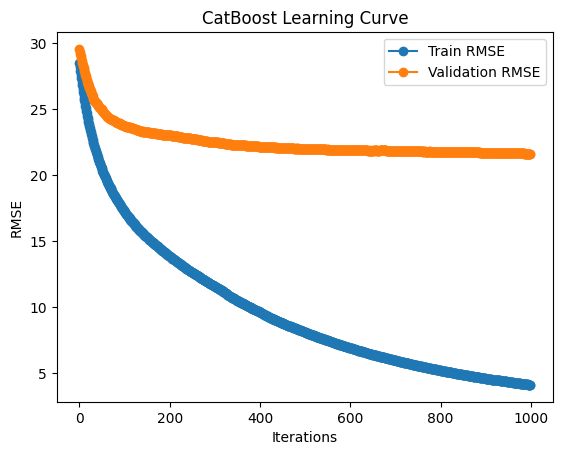

In [ ]:
import matplotlib.pyplot as plt
# 獲取訓練過程記錄
train_metrics = catboost_model.evals_result_['learn']
valid_metrics = catboost_model.evals_result_['validation']

# 提取 RMSE（或其他損失指標）的數值
train_rmse = train_metrics['RMSE']
valid_rmse = valid_metrics['RMSE']

# 獲取訓練迭代數
iterations = range(len(train_rmse))

# 繪製學習曲線
plt.plot(iterations, train_rmse, label='Train RMSE', marker='o')
plt.plot(iterations, valid_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.title('CatBoost Learning Curve')
plt.savefig('learning_curve.png')  # 保存學習曲線圖為圖片文件
plt.show()  # 顯示圖片（可選）


In [ ]:
move_files(sourse_base='Zindi_photos/test', source_dir_list=test['filename'].tolist(), destination_dir='/content/dataset/test')

In [ ]:
"""
encoded_test = pd.get_dummies(test, columns=['season'])
encoded_test['growth_stage'] = encoded_test['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})
feature_extraction_model.predict(train_generator)
"""

"\nencoded_test = pd.get_dummies(test, columns=['season'])\nencoded_test['growth_stage'] = encoded_test['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})\nfeature_extraction_model.predict(train_generator)\n"

In [ ]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
#from skimage.feature import greycomatrix, greycoprops
from PIL import Image
#from skimage import feature



def glcm_feature(base_dir, filename):
  path = os.path.join(base_dir,filename)
  img = Image.open(path) # 你要用這個套件的方式去開，不能直接傳nparray
  #plt.imshow(img)
  img1 = img.convert('L')  #convert a gray scale

  # transfer img1 into np.array
  img1 = np.array(img1)

  # 計算GLCM skimage.feature.graycomatrix
  glcm = skimage.feature.greycomatrix(img1, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=None, symmetric=True, normed=True)
  #glcm = skimage.feature.greycomatrix(img1, [1], [0], symmetric=True, normed=True)

  # 計算GLCM特徵
  contrast = skimage.feature.graycoprops(glcm, prop='contrast')
  correlation = skimage.feature.graycoprops(glcm, prop='correlation')
  homogeneity = skimage.feature.graycoprops(glcm, prop='homogeneity')
  energy = skimage.feature.graycoprops(glcm, prop='energy')
  dissimilarity = skimage.feature.graycoprops(glcm, prop='dissimilarity')
  entropy = skimage.measure.shannon_entropy(glcm)

  glcm_feat = dict( contrast=contrast[0,0], correlation=correlation[0,0], homogeneity=homogeneity[0,0], energy=energy[0,0], dissimilarity=dissimilarity[0,0], entropy=entropy)
  return glcm_feat


In [ ]:
def test_to_submission(test,batch_size,base_dir):

  for index,row in test.iterrows():
    feat = glcm_feature(base_dir=base_dir,filename=row['filename'])
    test.loc[index, 'contrast'] = feat['contrast']
    test.loc[index, 'correlation'] = feat['correlation']
    test.loc[index, 'energy'] = feat['energy']
    test.loc[index,'homogeneity'] = feat['homogeneity']
    test.loc[index,'dissimilarity'] = feat['dissimilarity']
    test.loc[index,'entropy'] = feat['entropy']
  encoded_test = pd.get_dummies(test, columns=['season'])
  encoded_test['growth_stage'] = encoded_test['growth_stage'].map({'S':1,'V':2,'F':3,'M':4})

  encoded_test['extent'] = 'NOT EXIST'
  test_generator = validation_datagen.flow_from_dataframe(dataframe=encoded_test, directory=base_dir,
                                            x_col="filename", y_col="extent", has_ext=True,
                                            class_mode="other", target_size=TARGET_SIZE,
                                            batch_size=batch_size, shuffle=False)

  image_feature_predict = feature_extraction_model.predict(test_generator)

  df_image_feature_predict = pd.DataFrame(image_feature_predict)

  mixed_features = pd.concat([df_image_feature_predict, encoded_test],axis=1)

  X_test = mixed_features.drop(columns=['ID', 'filename', 'damage', 'extent']).values

  extent_predict = catboost_model.predict(X_test)

  df_extent_predict = pd.DataFrame(extent_predict, columns = ['extent'])
  sub_predict = pd.concat([test, df_extent_predict],axis=1)


  sub_predict.loc[sub_predict['damage'] != 'DR', 'extent'] = 0
  Nonr_set_zeros = sub_predict['extent'].isna().sum()
  sub_predict.loc[sub_predict['extent'].isna(), 'extent'] = 0

  print(f"There are {Nonr_set_zeros} NaN set to zero.")

  submission = sub_predict.drop(['filename',	'growth_stage',	'damage',	'season', 'contrast',	'correlation', 'energy', 'homogeneity', 'dissimilarity', 'entropy'], axis=1)
  submission.to_csv('/content/submission.csv',index=False)

  return submission

In [ ]:
test = pd.read_csv("/content/Test.csv")

test=test
batch_size=BATCH_SIZE
base_dir='/content/dataset/test'

submission = test_to_submission(test=test,batch_size=BATCH_SIZE,base_dir=base_dir)

In [ ]:
submission.head()

,ID,extent
0,ID_ROOWKB90UZ,0.0
1,ID_PTEDRY0CYM,0.0
2,ID_5WJXDV96R4,0.0
3,ID_DM4AQLXXYG,0.0
4,ID_V6YTIT7I2S,0.0


In [ ]:
encoded_test

,ID,filename,growth_stage,damage,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021,extent
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,2,WD,769.809928,0.928156,0.018506,0.185620,15.716213,5.021000,0,0,1,0,NOT EXIST
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,3,WD,107.885231,0.990632,0.076887,0.318897,5.589476,3.206252,0,1,0,0,NOT EXIST
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,2,WD,241.066366,0.971912,0.016650,0.193593,9.481387,2.644680,0,0,0,1,NOT EXIST
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,3,G,60.848562,0.996358,0.129657,0.454540,3.769233,2.711062,1,0,0,0,NOT EXIST
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,3,G,631.392844,0.915272,0.020569,0.123072,16.943933,4.817210,0,1,0,0,NOT EXIST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8658,ID_VYEB1ABJYA,L1122F01093C01S10236Rp20455.jpg,2,WD,232.631886,0.981974,0.043719,0.344454,8.535576,3.631607,0,1,0,0,NOT EXIST
8659,ID_HQT6T7QYA4,L322F03389C39S14157Rp40614.jpg,2,WD,195.003879,0.986891,0.036950,0.263935,7.526685,2.277813,0,0,0,1,NOT EXIST
8660,ID_FKC93FVGL1,L134F00855C01S05273Rp06412.jpg,2,WD,198.256521,0.987407,0.201114,0.331667,7.815128,3.174415,0,0,1,0,NOT EXIST
8661,ID_EEJLBVEFGI,L410F02877C01S02293Rp01971.jpg,2,WD,214.738221,0.981494,0.070503,0.238817,9.441357,3.836884,0,0,1,0,NOT EXIST


In [ ]:
mixed_features = pd.concat([df_image_feature_predict, encoded_test],axis=1)
display(mixed_features.drop(columns=['ID', 'filename', 'damage', 'extent'])) #5131 columns ??

,0,1,2,3,4,5,6,7,8,9,...,contrast,correlation,energy,homogeneity,dissimilarity,entropy,season_LR2020,season_LR2021,season_SR2020,season_SR2021
0,0.000000,0.371245,0.412453,0.000000,0.937875,0.000000,0.206909,0.368760,1.391206,1.072314,...,769.809928,0.928156,0.018506,0.185620,15.716213,5.021000,0,0,1,0
1,0.000000,1.284999,0.945664,0.730058,0.000000,0.000000,0.000000,0.691591,1.382284,0.278270,...,107.885231,0.990632,0.076887,0.318897,5.589476,3.206252,0,1,0,0
2,0.172465,0.000000,0.848238,0.269299,0.000000,0.000000,0.000000,0.000000,0.814472,1.249145,...,241.066366,0.971912,0.016650,0.193593,9.481387,2.644680,0,0,0,1
3,0.000000,0.000000,1.275350,0.000000,0.000000,0.000000,0.838605,1.636051,1.504767,0.730638,...,60.848562,0.996358,0.129657,0.454540,3.769233,2.711062,1,0,0,0
4,1.028948,0.329510,0.000000,0.000000,0.000000,0.555834,0.000000,1.364054,1.778275,0.000000,...,631.392844,0.915272,0.020569,0.123072,16.943933,4.817210,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8658,0.605951,0.075810,0.107684,0.831018,0.000000,0.000000,0.000000,0.553872,2.534587,0.483627,...,232.631886,0.981974,0.043719,0.344454,8.535576,3.631607,0,1,0,0
8659,0.282694,0.000000,2.736589,0.000000,0.001019,0.000000,1.595574,0.193898,1.685186,1.237057,...,195.003879,0.986891,0.036950,0.263935,7.526685,2.277813,0,0,0,1
8660,0.000000,0.551080,0.094956,0.000000,0.000000,0.000000,0.344373,1.105222,2.029724,0.950647,...,198.256521,0.987407,0.201114,0.331667,7.815128,3.174415,0,0,1,0
8661,0.814284,1.077494,0.000000,0.828088,0.000000,0.026171,0.828821,0.096853,1.658666,0.629889,...,214.738221,0.981494,0.070503,0.238817,9.441357,3.836884,0,0,1,0


In [ ]:
X_test = mixed_features.drop(columns=['ID', 'filename', 'damage', 'extent']).values

sub_predict = catboost_model.predict(X_test)

In [ ]:
extent_predict = catboost_model.predict(X_test)

df_extent_predict = pd.DataFrame(extent_predict, columns = ['extent'])
sub_predict = pd.concat([test, df_extent_predict],axis=1)


sub_predict.loc[sub_predict['damage'] != 'DR', 'extent'] = 0
Nonr_set_zeros = sub_predict['extent'].isna().sum()
sub_predict.loc[sub_predict['extent'].isna(), 'extent'] = 0

print(f"There are {Nonr_set_zeros} NaN set to zero.")

sub_predict.drop(['filename',	'growth_stage',	'damage',	'season', 'contrast',	'correlation', 'energy', 'homogeneity', 'dissimilarity', 'entropy'], axis=1).to_csv('/content/submission.csv',index=False)

There are 0 NaN set to zero.


In [ ]:
sub_predict.loc[sub_predict['damage']!='DR']

,ID,filename,growth_stage,damage,season,contrast,correlation,energy,homogeneity,dissimilarity,entropy,extent
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020,769.809928,0.928156,0.018506,0.185620,15.716213,5.021000,0.0
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021,107.885231,0.990632,0.076887,0.318897,5.589476,3.206252,0.0
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021,241.066366,0.971912,0.016650,0.193593,9.481387,2.644680,0.0
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020,60.848562,0.996358,0.129657,0.454540,3.769233,2.711062,0.0
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021,631.392844,0.915272,0.020569,0.123072,16.943933,4.817210,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8658,ID_VYEB1ABJYA,L1122F01093C01S10236Rp20455.jpg,V,WD,LR2021,232.631886,0.981974,0.043719,0.344454,8.535576,3.631607,0.0
8659,ID_HQT6T7QYA4,L322F03389C39S14157Rp40614.jpg,V,WD,SR2021,195.003879,0.986891,0.036950,0.263935,7.526685,2.277813,0.0
8660,ID_FKC93FVGL1,L134F00855C01S05273Rp06412.jpg,V,WD,SR2020,198.256521,0.987407,0.201114,0.331667,7.815128,3.174415,0.0
8661,ID_EEJLBVEFGI,L410F02877C01S02293Rp01971.jpg,V,WD,SR2020,214.738221,0.981494,0.070503,0.238817,9.441357,3.836884,0.0


In [ ]:
try_sub = sub_predict.drop(['filename',	'growth_stage',	'damage',	'season', 'contrast',	'correlation', 'energy', 'homogeneity', 'dissimilarity', 'entropy'], axis=1)
display(try_sub)

,ID,extent
0,ID_ROOWKB90UZ,0.0
1,ID_PTEDRY0CYM,0.0
2,ID_5WJXDV96R4,0.0
3,ID_DM4AQLXXYG,0.0
4,ID_V6YTIT7I2S,0.0
...,...,...
8658,ID_VYEB1ABJYA,0.0
8659,ID_HQT6T7QYA4,0.0
8660,ID_FKC93FVGL1,0.0
8661,ID_EEJLBVEFGI,0.0
